In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('LifeExpectancy.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

# EDA (Data Cleaning & Filtering Outliers)

In [7]:
#use linear interpolate to fill in missing data

for col in df.columns:
 df[col] = df[col].interpolate(method='linear',limit_direction='both')

In [8]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

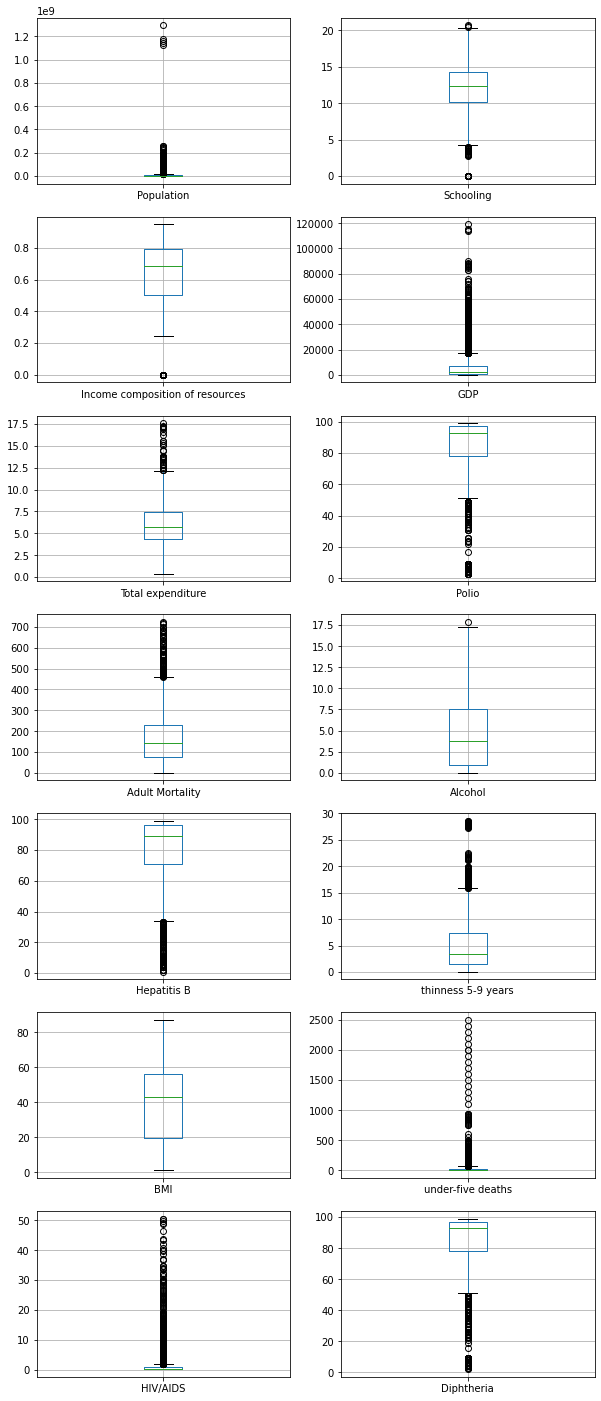

In [9]:
# Detecting & Filtering Outliers using s with the IQR score
fig, axes = plt.subplots(7,2,figsize=(10,25))
df.boxplot(column='Population', ax=axes[0,0])

df.boxplot(column='Schooling',ax=axes[0,1])

df.boxplot(column='Income composition of resources',ax=axes[1,0])
df.boxplot(column='GDP',ax=axes[1,1])

df.boxplot(column='Total expenditure',ax=axes[2,0])
df.boxplot(column='Polio',ax=axes[2,1])

df.boxplot(column='Adult Mortality',ax=axes[3,0])
df.boxplot(column='Alcohol',ax=axes[3,1])

df.boxplot(column='Hepatitis B',ax=axes[4,0])
df.boxplot(column='thinness 5-9 years',ax=axes[4,1])

df.boxplot(column='BMI',ax=axes[5,0])
df.boxplot(column='under-five deaths',ax=axes[5,1])

df.boxplot(column='HIV/AIDS',ax=axes[6,0])
df.boxplot(column='Diphtheria',ax=axes[6,1])

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                               8.000000e+00
Life expectancy                    1.250000e+01
Adult Mortality                    1.540000e+02
infant deaths                      2.200000e+01
Alcohol                            6.647500e+00
percentage expenditure             4.368488e+02
Hepatitis B                        2.500000e+01
Measles                            3.602500e+02
BMI                                3.677500e+01
under-five deaths                  2.800000e+01
Polio                              1.900000e+01
Total expenditure                  3.127500e+00
Diphtheria                         1.900000e+01
HIV/AIDS                           7.000000e-01
GDP                                6.635257e+03
Population                         7.954483e+06
thinness  1-19 years               5.600000e+00
thinness 5-9 years                 5.700000e+00
Income composition of resources    2.911071e-01
Schooling                          4.100000e+00
dtype: float64


In [11]:
#using the IQR formular to clean the data
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df_clean.shape

(1117, 22)

In [13]:
df_clean.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.046186,-0.026471,0.062363,-0.136004,-0.041569,0.153244,0.032863,-0.015976,0.071424,-0.030733,0.036035,0.022674,0.003294,0.058686,0.001704,0.025769,0.035145,0.012818,0.068773
Life expectancy,0.046186,1.000000,-0.564329,-0.333388,0.406726,0.324035,0.154186,-0.113293,0.386781,-0.376161,0.346108,0.274791,0.357826,-0.484477,0.151110,0.016706,-0.390887,-0.389912,0.805275,0.681330
Adult Mortality,-0.026471,-0.564329,1.000000,0.230186,-0.105939,-0.197141,-0.144125,0.081875,-0.255414,0.246407,-0.190374,-0.145796,-0.192808,0.331473,-0.043454,0.002054,0.166043,0.169304,-0.438029,-0.355802
infant deaths,0.062363,-0.333388,0.230186,1.000000,-0.273842,-0.135409,-0.122990,0.304604,-0.165646,0.990827,-0.194155,-0.078475,-0.197169,0.160815,-0.100949,0.196528,0.230328,0.224847,-0.370746,-0.342771
Alcohol,-0.136004,0.406726,-0.105939,-0.273842,1.000000,0.158691,0.117749,-0.111140,0.245870,-0.280712,0.262291,0.300141,0.270393,-0.190044,0.269904,0.008718,-0.392228,-0.385471,0.546137,0.488217
percentage expenditure,-0.041569,0.324035,-0.197141,-0.135409,0.158691,1.000000,0.063083,-0.046848,0.176364,-0.149709,0.099510,0.120599,0.122829,-0.153798,0.276896,0.047876,-0.154892,-0.160608,0.294088,0.294369
Hepatitis B,0.153244,0.154186,-0.144125,-0.122990,0.117749,0.063083,1.000000,-0.086199,0.093393,-0.138650,0.579782,0.087311,0.618393,-0.185202,0.099585,0.046312,-0.022081,-0.026047,0.205560,0.189146
Measles,0.032863,-0.113293,0.081875,0.304604,-0.111140,-0.046848,-0.086199,1.000000,-0.085606,0.309308,-0.076544,-0.103122,-0.064787,0.057060,-0.030443,0.082037,0.196054,0.192717,-0.085280,-0.086419
BMI,-0.015976,0.386781,-0.255414,-0.165646,0.245870,0.176364,0.093393,-0.085606,1.000000,-0.197933,0.122247,0.177492,0.131703,-0.288259,0.133144,0.074976,-0.511788,-0.517439,0.433088,0.389796
under-five deaths,0.071424,-0.376161,0.246407,0.990827,-0.280712,-0.149709,-0.138650,0.309308,-0.197933,1.000000,-0.217930,-0.084952,-0.219652,0.206854,-0.114807,0.192571,0.258271,0.249987,-0.412359,-0.375279


In [14]:
df_clean.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

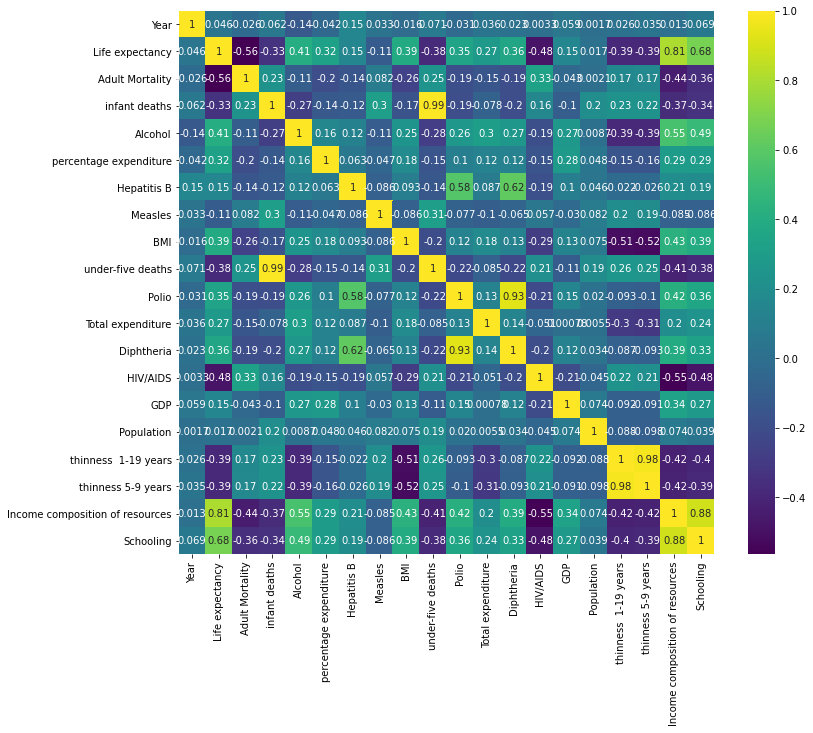

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(),cmap='viridis',annot=True)

# **Linear Regression Univariate**

In [16]:
#choosing our variables
X = df_clean[['Schooling']]
y = df_clean['Life expectancy']

In [17]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
#Training the Model
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation 

In [21]:
print('Coefficients:\n',lm.coef_)
print('\n')
print('Intercept:\n',lm.intercept_)

Coefficients:
 [1.60319494]


Intercept:
 51.67966448295152


In [22]:
#get the coefficient
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Schooling,1.603195


## Predictions

In [23]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

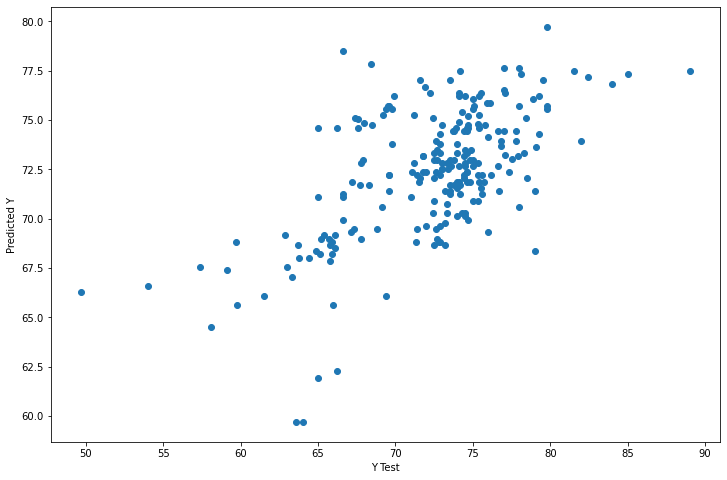

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Regression Evaluation Metrics

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.214284706065737
MSE: 17.196979047534075
RMSE: 4.146924046511351


In [26]:
# print the intercept
print(lm.intercept_)

51.67966448295152


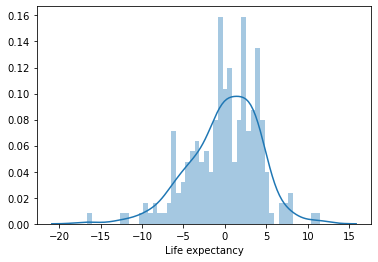

In [27]:
#the residuals
sns.distplot((y_test-predictions),bins=50);

In [28]:
predictions

array([74.44503268, 74.12439369, 73.6434352 , 71.39896228, 69.95608683,
       71.71960127, 72.68151824, 76.5291861 , 72.68151824, 77.17046408,
       74.44503268, 76.36886661, 73.8037547 , 75.22699919, 70.27672582,
       72.36087925, 71.87992077, 71.07832329, 75.72758863, 73.00215723,
       75.08631065, 68.35289189, 72.36087925, 74.60535217, 67.87193341,
       75.56726914, 75.56726914, 65.62746049, 73.00215723, 74.78857445,
       74.44503268, 71.23864279, 76.20854711, 73.96407419, 70.27672582,
       62.26075111, 69.95608683, 72.20055975, 68.0322529 , 66.26873847,
       76.84982509, 69.15448936, 77.65142256, 73.48311571, 71.87992077,
       73.16247672, 69.15448936, 72.84183773, 76.04822762, 70.9180038 ,
       71.39896228, 72.20055975, 72.36087925, 72.36087925, 73.16247672,
       72.68151824, 68.99416987, 68.51321139, 74.60535217, 74.76567166,
       75.72758863, 73.8037547 , 76.36886661, 79.73557599, 72.20055975,
       64.50522403, 72.04024026, 59.6956392 , 67.07033594, 77.85

## Optimization using Gradient Descent 

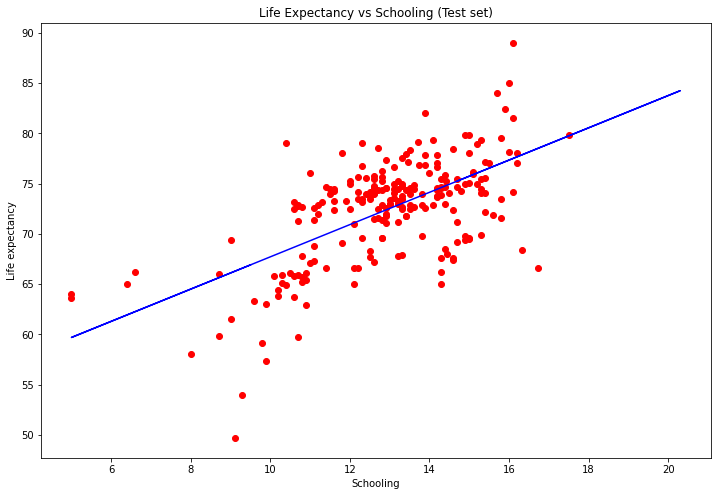

In [29]:
# plotting the Test set
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('Life Expectancy vs Schooling (Test set)')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.show()

In [30]:
#the gradient descent function

#choosing our variables
X = X_train['Schooling']
Y = y_train



In [31]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

5.4080380625727305 0.7556514022519032


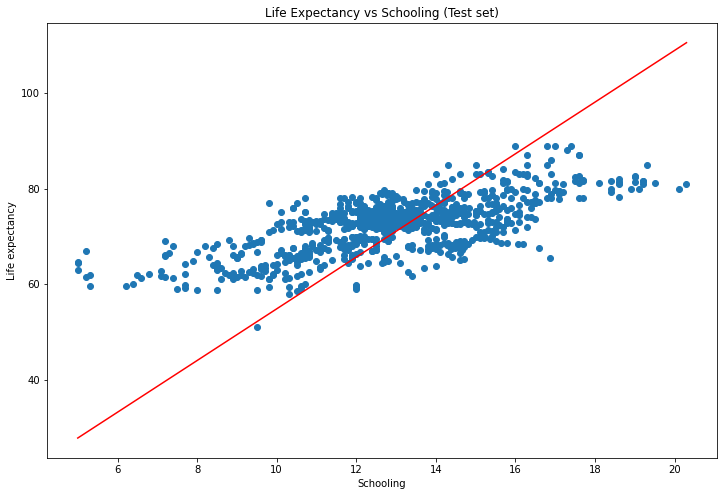

In [36]:
# Making predictions
Y_pred = m*X + c
plt.figure(figsize=(12,8))
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.title('Life Expectancy vs Schooling (Test set)')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.show()

In [33]:
Y_pred

659     80.253811
1922    93.233102
1150    56.458443
38      71.600950
1305    68.896931
          ...    
1554    56.458443
2554    61.866482
228     84.580241
1639    79.713007
2249    52.132013
Name: Schooling, Length: 893, dtype: float64

old equation

y=1.60319494x+51.67966448295152

new equation 

y=5.417787503836531x+0.7367669213503176


In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, Y_pred))
print('MSE:', metrics.mean_squared_error(y_train, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, Y_pred)))

MAE: 8.084690713493016
MSE: 105.58932788851375
RMSE: 10.275666785591763


## from the last figure, we can see that our points are nearer to line as compared to the previous 